In [7]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv("Tweets.csv")

In [10]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
# Check shape of dataset
print("Dataset Shape:", df.shape)

# Display column names
print("\nColumns in Dataset:")
print(df.columns)

Dataset Shape: (14640, 15)

Columns in Dataset:
Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [12]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [13]:
# Step 2: Data Cleaning & Column Selection

df_clean = df[['text', 'airline_sentiment']].copy()

df_clean.rename(columns={
    'text': 'review',
    'airline_sentiment': 'sentiment'
}, inplace=True)

print("Missing values:")
print(df_clean.isnull().sum())

df_clean.dropna(inplace=True)

print("\nSentiment Distribution:")
print(df_clean['sentiment'].value_counts())

df_clean.head()


Missing values:
review       0
sentiment    0
dtype: int64

Sentiment Distribution:
sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


,review,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df_clean['clean_review'] = df_clean['review'].apply(clean_text)

df_clean[['review', 'clean_review']].head()


,review,clean_review
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define input and output
X = df_clean['clean_review']
y = df_clean['sentiment']

# Initialize TF-IDF
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)

# Transform text data
X_tfidf = tfidf.fit_transform(X)

print("TF-IDF Matrix Shape:", X_tfidf.shape)
print("Target Labels:", y.unique())


TF-IDF Matrix Shape: (14640, 5000)
Target Labels: ['neutral' 'positive' 'negative']


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, n_jobs=-1)
lr_model.fit(X_train, y_train)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

print("Models trained successfully!")


Models trained successfully!


In [17]:
# Predictions
lr_pred = lr_model.predict(X_test)
nb_pred = nb_model.predict(X_test)


In [18]:
from sklearn.metrics import accuracy_score

lr_acc = accuracy_score(y_test, lr_pred)
nb_acc = accuracy_score(y_test, nb_pred)

print("Logistic Regression Accuracy:", lr_acc)
print("Naive Bayes Accuracy:", nb_acc)


Logistic Regression Accuracy: 0.7855191256830601
Naive Bayes Accuracy: 0.7455601092896175


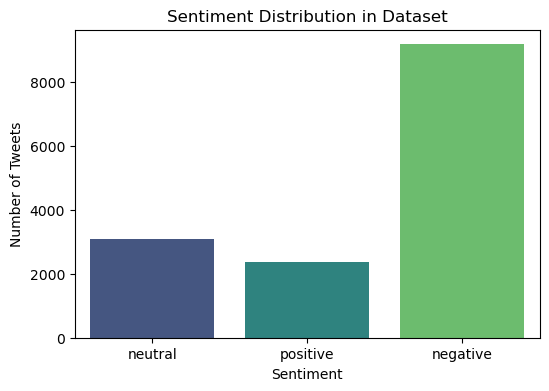

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

sns.countplot(
    x='sentiment',
    hue='sentiment',
    data=df_clean,
    palette='viridis',
    legend=False
)

plt.title("Sentiment Distribution in Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


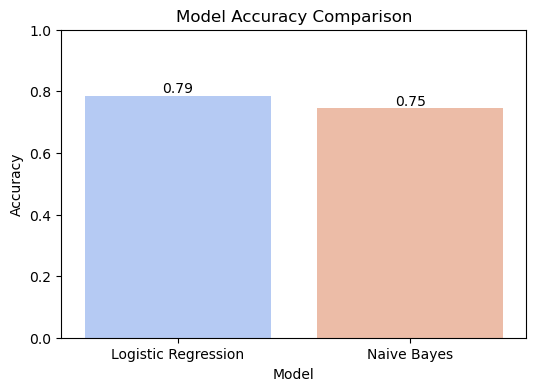

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Final accuracies (already computed earlier)
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes'],
    'Accuracy': [0.7855, 0.7456]
})

# Plot
plt.figure(figsize=(6,4))
sns.barplot(
    x='Model',
    y='Accuracy',
    hue='Model',
    data=comparison_df,
    palette='coolwarm',
    legend=False
)

plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

# Add values on bars
for i, acc in enumerate(comparison_df['Accuracy']):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')

plt.show()


In [21]:
labels = ['negative', 'neutral', 'positive']


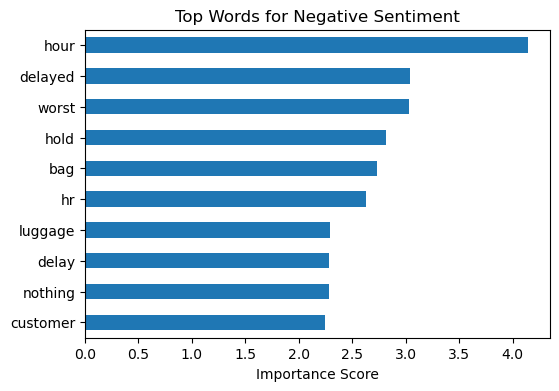

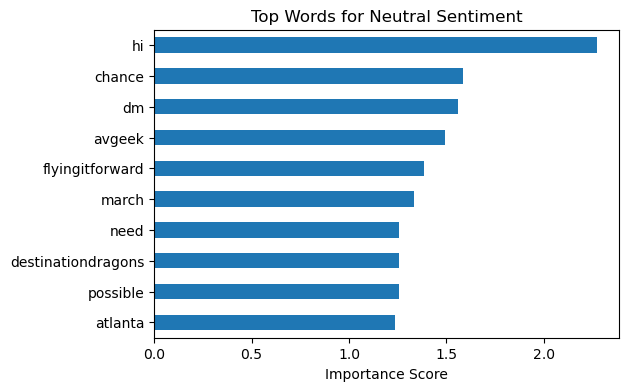

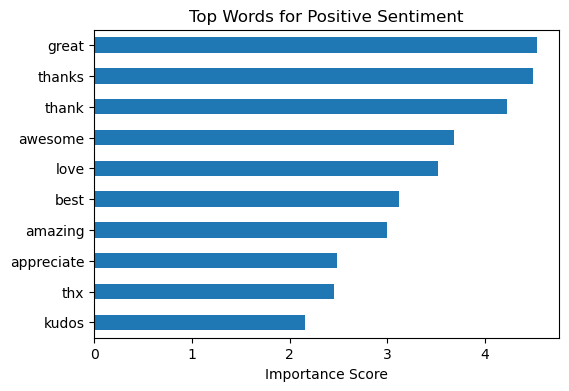

In [22]:
import numpy as np

# Get feature names
feature_names = tfidf.get_feature_names_out()

# Get coefficients for Logistic Regression
coefficients = lr_model.coef_

# Create DataFrame
coef_df = pd.DataFrame(coefficients.T, index=feature_names, columns=lr_model.classes_)

# Plot top words for each sentiment
for sentiment in coef_df.columns:
    top_words = coef_df[sentiment].sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(6,4))
    top_words.plot(kind='barh')
    plt.title(f"Top Words for {sentiment.capitalize()} Sentiment")
    plt.xlabel("Importance Score")
    plt.gca().invert_yaxis()
    plt.show()


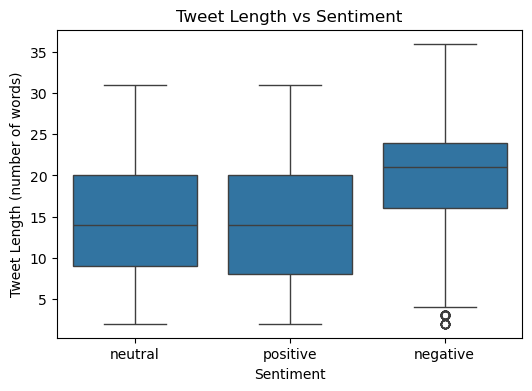

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load dataset again (safe after kernel restart)
df = pd.read_csv("Tweets.csv")

# STEP 2: Create df_clean properly
df_clean = df[['text', 'airline_sentiment']].copy()
df_clean.rename(columns={
    'text': 'clean_review',
    'airline_sentiment': 'sentiment'
}, inplace=True)

# STEP 3: Ensure text is string
df_clean['clean_review'] = df_clean['clean_review'].astype(str)

# STEP 4: Create tweet_length column (number of words)
df_clean['tweet_length'] = df_clean['clean_review'].apply(lambda x: len(x.split()))

# STEP 5: Boxplot (NO hue, NO legend, NO error)
plt.figure(figsize=(6,4))
sns.boxplot(
    x='sentiment',
    y='tweet_length',
    data=df_clean
)

plt.title("Tweet Length vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length (number of words)")
plt.show()


In [24]:
from sklearn.metrics import classification_report

print("Logistic Regression Report:\n")
print(classification_report(y_test, lr_pred))

print("\nNaive Bayes Report:\n")
print(classification_report(y_test, nb_pred))


Logistic Regression Report:

              precision    recall  f1-score   support

    negative       0.81      0.94      0.87      1835
     neutral       0.65      0.51      0.57       620
    positive       0.81      0.56      0.66       473

    accuracy                           0.79      2928
   macro avg       0.76      0.67      0.70      2928
weighted avg       0.78      0.79      0.77      2928


Naive Bayes Report:

              precision    recall  f1-score   support

    negative       0.74      0.98      0.84      1835
     neutral       0.72      0.30      0.42       620
    positive       0.85      0.42      0.57       473

    accuracy                           0.75      2928
   macro avg       0.77      0.57      0.61      2928
weighted avg       0.75      0.75      0.71      2928



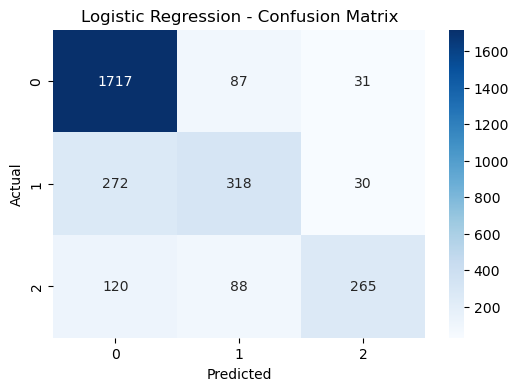

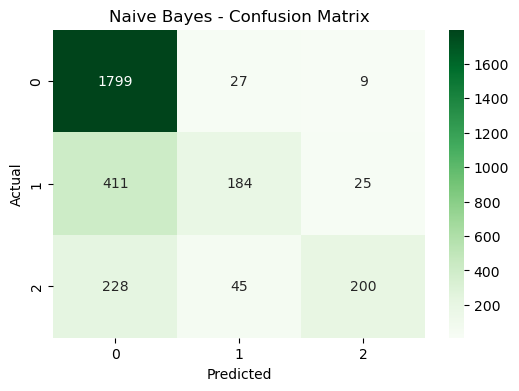

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, lr_pred),
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Naive Bayes Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, nb_pred),
    annot=True,
    fmt='d',
    cmap='Greens'
)
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes'],
    'Accuracy': [lr_acc, nb_acc]
})

comparison_df


,Model,Accuracy
0,Logistic Regression,0.785519
1,Naive Bayes,0.745560


In [27]:
def predict_sentiment(text):
    # Step 1: clean the input text
    cleaned_text = clean_text(text)
    
    # Step 2: convert text to TF-IDF features
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Step 3: predict sentiment
    prediction = lr_model.predict(vectorized_text)[0]
    
    return prediction


In [28]:
text = "The flight was delayed and staff was very rude"
print("Text:", text)
print("Predicted Sentiment:", predict_sentiment(text))


Text: The flight was delayed and staff was very rude
Predicted Sentiment: negative


In [29]:
text = "I really loved the smooth boarding experience"
print("Predicted Sentiment:", predict_sentiment(text))


Predicted Sentiment: positive


In [30]:
text = "The flight was okay, nothing special"
print("Predicted Sentiment:", predict_sentiment(text))


Predicted Sentiment: negative


In [31]:
text = "The flight was okay, nothing special"
print("Predicted Sentiment:", predict_sentiment(text))


Predicted Sentiment: negative


In [32]:
new_tweets = [
    "Worst airline experience ever",
    "Very comfortable and friendly staff",
    "Flight was on time"
]

for tweet in new_tweets:
    print(f"Tweet: {tweet}")
    print("Sentiment:", predict_sentiment(tweet))
    print("-" * 40)


Tweet: Worst airline experience ever
Sentiment: negative
----------------------------------------
Tweet: Very comfortable and friendly staff
Sentiment: positive
----------------------------------------
Tweet: Flight was on time
Sentiment: negative
----------------------------------------
